In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 86s 107ms/step - loss: 1.6071 - accuracy: 0.4111 - val_loss: 1.3201 - val_accuracy: 0.5205
Epoch 2/10
782/782 [==============================] - 71s 91ms/step - loss: 1.2223 - accuracy: 0.5663 - val_loss: 1.1306 - val_accuracy: 0.5964
Epoch 3/10
782/782 [==============================] - 68s 87ms/step - loss: 1.0673 - accuracy: 0.6246 - val_loss: 1.0195 - val_accuracy: 0.6394
Epoch 4/10
782/782 [==============================] - 68s 87ms/step - loss: 0.9672 - accuracy: 0.6619 - val_loss: 0.9743 - val_accuracy: 0.6577
Epoch 5/10
782/782 [==============================] - 71s 91ms/step - loss: 0.8970 - accuracy: 0.6870 - val_loss: 0.9591 - val_accuracy: 0.6647
Epoch 6/10
782/782 [==============================] - 67s 85ms/step - loss: 0.8437 - accuracy: 0.7063 - val_loss: 0.9170 - val_accuracy: 0.6782
Epoch 7/10
782/782 [==============================] - 68s 87ms/step - loss: 0.7978 - accuracy: 0.7190 - val_loss: 0.9023 - val_accuracy

In [3]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Predict classes
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print metrics
print(f'Test accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

313/313 [==============================] - 4s 12ms/step
Test accuracy: 0.7080000042915344
Precision: 0.7136905130934729
Recall: 0.708
F1-score: 0.7088982013495829
Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.69      0.73      1000
  automobile       0.86      0.80      0.83      1000
        bird       0.63      0.59      0.61      1000
         cat       0.55      0.49      0.52      1000
        deer       0.63      0.70      0.67      1000
         dog       0.54      0.70      0.61      1000
        frog       0.76      0.79      0.78      1000
       horse       0.77      0.72      0.75      1000
        ship       0.81      0.80      0.81      1000
       truck       0.81      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



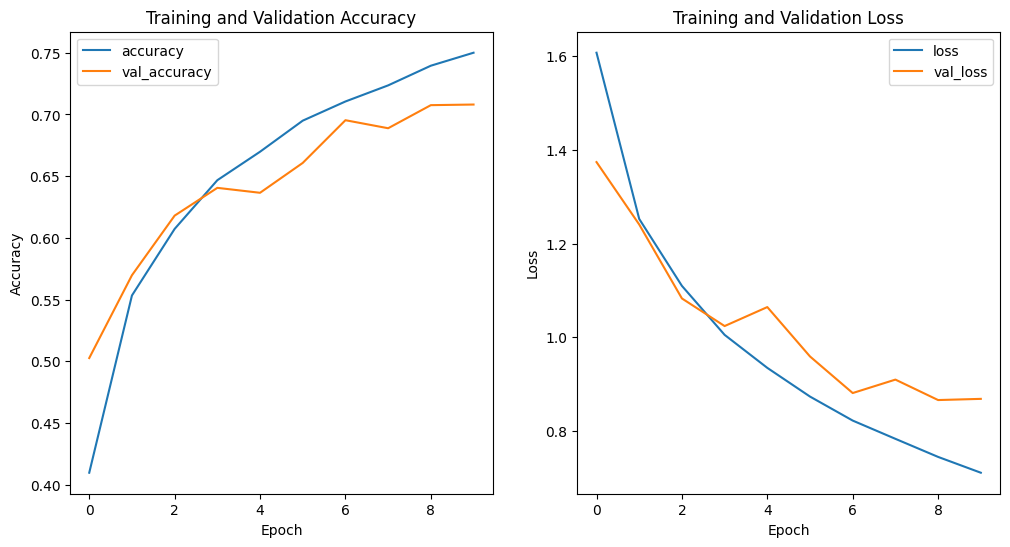

In [4]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()